In [39]:
from numpy.testing.print_coercion_tables import print_new_cast_table
%load_ext autoreload
%autoreload 2

import os
import warnings
from typing import Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import io

from src.utils.figure import plot_lines
from src.utils.file import get_data_file_path
from src.utils.file import get_evaluation_file_path
from src.utils.metrics import metrics



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Presentation

In [40]:
presentation_row = 150
path = get_data_file_path(event_n=3, formula_n=3, count=2000)
data = pd.read_csv(path)

In [41]:
data.head()

,id,context,query,question,code,formula,answer,graph
0,0,"Initially, event3 happened. After event1, even...",C1: Event1 happens or event2 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(X ((event1 | event2) & event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
1,1,"Initially, event1 happened. After event3, no o...",C1: Event2 eventually happens.\nC2: If event2 ...,"=== Context ===\n\nInitially, event1 happened....","MODULE main\nVAR\n state : {event1, event2,...",(G (event2 -> (F event2))),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
2,2,"Initially, event2 happened. After event2, even...",C1: Event3 happens in the next state.\nC2: Eve...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",((X event3) -> (X event3)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
3,3,"Initially, event3 happened. After event1, eith...",C1: Event2 happens and event3 happens.\nC2: Ev...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! (event1 | (event2 & event3))),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
4,4,"Initially, event2 happened. After event1, even...",C1: Event3 happens or event3 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! ((event3 | event3) | event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2000 non-null   int64 
 1   context   2000 non-null   object
 2   query     2000 non-null   object
 3   question  2000 non-null   object
 4   code      2000 non-null   object
 5   formula   2000 non-null   object
 6   answer    2000 non-null   bool  
 7   graph     2000 non-null   object
dtypes: bool(1), int64(1), object(6)
memory usage: 111.5+ KB


In [43]:
# Context
print(data.loc[presentation_row, 'context'])

Initially, event1 happened. After event2, no other events can happen. After event1, event2 must happen. After event3, event1 must happen.


In [44]:
# Query 
print(data.loc[presentation_row, 'query'])

C1: Event3 does not happen.
C2: Event3 happens or C1 holds.
C3: C2 eventually holds.


In [45]:
# Question
print(data.loc[presentation_row, 'question'])

=== Context ===

Initially, event1 happened. After event2, no other events can happen. After event1, event2 must happen. After event3, event1 must happen.

=== Hypothesis ===

C1: Event3 does not happen.
C2: Event3 happens or C1 holds.
C3: C2 eventually holds.

C3 is True or False?



In [46]:
# Code
print(data.loc[presentation_row, 'code'])

MODULE main
VAR
    state : {event1, event2, event3};
ASSIGN
    init(state) := event1;
    next(state) := case
        state = event1 : event2;
		state = event2 : event2;
		state = event3 : event1;
    esac;
LTLSPEC (F ((state=event3) | (! (state=event3))))



In [47]:
# Formula
print(data.loc[presentation_row, 'formula'])

(F (event3 | (! event3)))


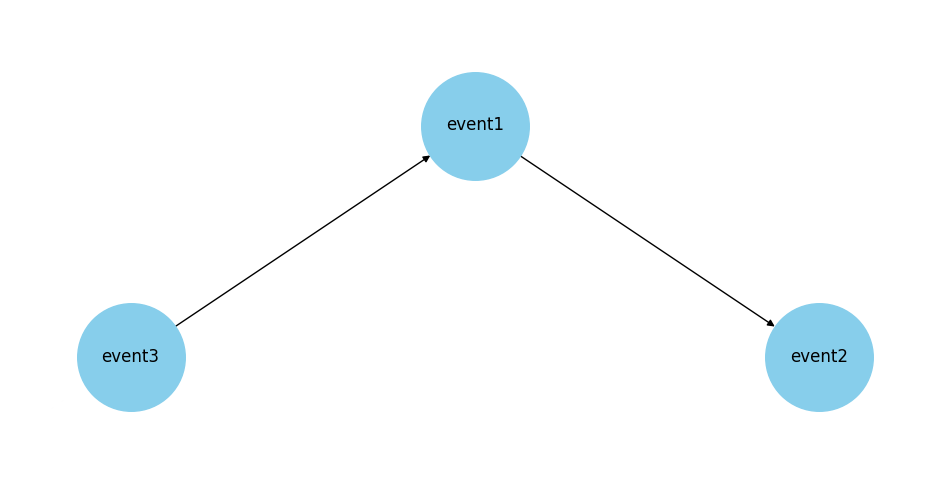

In [48]:
# Plot Graph
graph = nx.read_graphml(io.StringIO(data.loc[presentation_row, 'graph']))
plt.figure(figsize=(12, 6))
plt.xlim(-2.7, 2.7)
plt.ylim(-1.0, 3.0)
pos = {"event1": (0, 2), "event2": (2, 0), "event3": (-2, 0)}
nx.draw(graph, pos, with_labels=True, node_size=6000, node_color='skyblue')
plt.show()

In [49]:
# Answer
print(data.loc[presentation_row, 'answer'])

True


# Prediction Presentation


In [50]:
strategy = "direct"  # Options: direct, zero_shot_cot, few_shot_cot, self_consistency, least_to_most
path = get_evaluation_file_path(event_n=3, formula_n=3, count=2000, model="gpt-4o-mini", strategy=strategy)
data = pd.read_csv(path)

In [51]:
data.head()

,id,context,query,question,code,formula,answer,graph,prediction,prediction_raw
0,0,"Initially, event3 happened. After event1, even...",C1: Event1 happens or event2 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(X ((event1 | event2) & event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",1,True
1,1,"Initially, event1 happened. After event3, no o...",C1: Event2 eventually happens.\nC2: If event2 ...,"=== Context ===\n\nInitially, event1 happened....","MODULE main\nVAR\n state : {event1, event2,...",(G (event2 -> (F event2))),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",1,True
2,2,"Initially, event2 happened. After event2, even...",C1: Event3 happens in the next state.\nC2: Eve...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",((X event3) -> (X event3)),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",1,True
3,3,"Initially, event3 happened. After event1, eith...",C1: Event2 happens and event3 happens.\nC2: Ev...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! (event1 | (event2 & event3))),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",0,"To determine whether C3 is True or False, let'..."
4,4,"Initially, event2 happened. After event1, even...",C1: Event3 happens or event3 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! ((event3 | event3) | event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",0,"To determine the truth value of C3, we need to..."


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2000 non-null   int64 
 1   context         2000 non-null   object
 2   query           2000 non-null   object
 3   question        2000 non-null   object
 4   code            2000 non-null   object
 5   formula         2000 non-null   object
 6   answer          2000 non-null   bool  
 7   graph           2000 non-null   object
 8   prediction      2000 non-null   int64 
 9   prediction_raw  2000 non-null   object
dtypes: bool(1), int64(2), object(7)
memory usage: 142.7+ KB


In [53]:
data['answer'] = data['answer'].apply(lambda x: 1 if x else 0)
data['prediction'] = data['prediction'].astype(int)

In [54]:
# Accuracy
print(f'{len(data[data["answer"] == data["prediction"]]) * 100 / len(data)}%')

63.5%


In [55]:
# Prediction Distribution
data['prediction'].value_counts()

prediction
1    1200
0     800
Name: count, dtype: int64

In [56]:
# Precision, Recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(data['answer'], data['prediction'], average='macro')
recall = recall_score(data['answer'], data['prediction'], average='macro')
f1 = f1_score(data['answer'], data['prediction'], average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Precision: 0.640625
Recall: 0.635
F1: 0.6313131313131313


# LLMs Evaluation


In [57]:
models = ["gpt-3.5-turbo", "gpt-4o-mini", "gpt-5-mini", "gemma3:12b-it-q8_0", "mistral:7b-instruct",
          "deepseek-reasoner",
          "deepseek-chat", "phi4:14b", "qwen-turbo", "qwen2.5-72b-instruct", "qwen3-14b", "qwen3-32b"]
strategies = ["direct", "zero_shot_cot", "few_shot_cot", "self_consistency", "least_to_most"]

## 1. LTLBench: Event 3, Operator 3, Count 2000

In [58]:
# show results
def show_results(_models: list[str], _strategy: str, _event_n=3, _formula_n=3, _count=2000):
    _models_metrics = {}
    for _model in _models:
        _path = get_evaluation_file_path(
            event_n=_event_n,
            formula_n=_formula_n,
            count=_count,
            model=_model,
            strategy=_strategy,
        )

        if not os.path.exists(_path):
            warnings.warn(f"Evaluation file of model '{_model}' with strategy '{_strategy}' does not exist.", UserWarning)
            continue

        _data = pd.read_csv(_path)
        _data["answer"] = _data["answer"].apply(lambda x: 1 if x else 0)
        _data["prediction"] = _data["prediction"].apply(lambda x: 1 if pd.notna(x) and x == 1 else 0)
        _models_metrics[_model] = metrics(_data)["raw"]
    return pd.DataFrame(_models_metrics).transpose()

### Direct

In [59]:
show_results(models, "direct")

,accuracy,precision,recall,f1,auc
gpt-3.5-turbo,0.5325,0.551861,0.5325,0.484377,0.5325
gpt-4o-mini,0.6350,0.640625,0.6350,0.631313,0.6350
gpt-5-mini,0.7970,0.797076,0.7970,0.796987,0.7970
gemma3:12b-it-q8_0,0.6015,0.601904,0.6015,0.601104,0.6015
mistral:7b-instruct,0.5560,0.556044,0.5560,0.555913,0.5560
deepseek-reasoner,0.7155,0.735738,0.7155,0.709260,0.7155
deepseek-chat,0.8010,0.801059,0.8010,0.800990,0.8010
phi4:14b,0.6665,0.683088,0.6665,0.658771,0.6665
qwen-turbo,0.6650,0.665519,0.6650,0.664737,0.6650
qwen2.5-72b-instruct,0.5905,0.610680,0.5905,0.570943,0.5905


### Zero-Shot Cot

In [60]:
show_results(models, "zero_shot_cot")

,accuracy,precision,recall,f1,auc
gpt-3.5-turbo,0.5655,0.569683,0.5655,0.558880,0.5655
gpt-4o-mini,0.6260,0.626267,0.6260,0.625802,0.6260
gpt-5-mini,0.7845,0.785861,0.7845,0.784243,0.7845
gemma3:12b-it-q8_0,0.6720,0.675145,0.6720,0.670521,0.6720
mistral:7b-instruct,0.5735,0.573663,0.5735,0.573264,0.5735
deepseek-reasoner,0.6995,0.724719,0.6995,0.690826,0.6995
deepseek-chat,0.7865,0.786548,0.7865,0.786491,0.7865
phi4:14b,0.6560,0.669686,0.6560,0.648921,0.6560
qwen-turbo,0.6760,0.676594,0.6760,0.675727,0.6760
qwen2.5-72b-instruct,0.6810,0.691110,0.6810,0.676725,0.6810


### Few-Shot Cot

In [61]:
show_results(models, "few_shot_cot")

,accuracy,precision,recall,f1,auc
gpt-3.5-turbo,0.6040,0.604376,0.6040,0.603643,0.6040
gpt-4o-mini,0.7155,0.715635,0.7155,0.715456,0.7155
gpt-5-mini,0.9395,0.940933,0.9395,0.939451,0.9395
gemma3:12b-it-q8_0,0.7840,0.784551,0.7840,0.783895,0.7840
mistral:7b-instruct,0.6025,0.602503,0.6025,0.602498,0.6025
deepseek-reasoner,0.8110,0.834299,0.8110,0.807648,0.8110
deepseek-chat,0.9040,0.904079,0.9040,0.903995,0.9040
phi4:14b,0.7350,0.740862,0.7350,0.733378,0.7350
qwen-turbo,0.7870,0.787093,0.7870,0.786983,0.7870
qwen2.5-72b-instruct,0.7605,0.768730,0.7605,0.758652,0.7605


### Self-Consistency

In [62]:
show_results(models, "self_consistency")

,accuracy,precision,recall,f1,auc
gpt-3.5-turbo,0.5710,0.578022,0.5710,0.561125,0.5710
gpt-4o-mini,0.6325,0.632995,0.6325,0.632158,0.6325
gpt-5-mini,0.8035,0.803525,0.8035,0.803496,0.8035
gemma3:12b-it-q8_0,0.6820,0.687416,0.6820,0.679686,0.6820
mistral:7b-instruct,0.5900,0.590001,0.5900,0.589998,0.5900
deepseek-reasoner,0.7370,0.743387,0.7370,0.735263,0.7370
deepseek-chat,0.7940,0.794005,0.7940,0.793999,0.7940
phi4:14b,0.6590,0.676147,0.6590,0.650494,0.6590
qwen-turbo,0.6890,0.689273,0.6890,0.688888,0.6890
qwen2.5-72b-instruct,0.6775,0.688445,0.6775,0.672748,0.6775


### Least-to-Most

In [63]:
show_results(models, "least_to_most")

,accuracy,precision,recall,f1,auc
gpt-3.5-turbo,0.5105,0.537608,0.5105,0.402903,0.5105
gpt-4o-mini,0.6370,0.638740,0.6370,0.635858,0.6370
gpt-5-mini,0.7775,0.777600,0.7775,0.777480,0.7775
gemma3:12b-it-q8_0,0.6720,0.678302,0.6720,0.669076,0.6720
mistral:7b-instruct,0.5770,0.577379,0.5770,0.576481,0.5770
deepseek-reasoner,0.7275,0.740324,0.7275,0.723816,0.7275
deepseek-chat,0.8105,0.810570,0.8105,0.810489,0.8105
phi4:14b,0.6615,0.679290,0.6615,0.652889,0.6615
qwen-turbo,0.6960,0.696095,0.6960,0.695963,0.6960
qwen2.5-72b-instruct,0.6990,0.710320,0.6990,0.694895,0.6990


## 2. Event 2, Operator 1-9, Count 300

In [64]:
models = ["deepseek-reasoner", "gpt-5-mini","qwen-turbo"]

In [65]:
def show_results_across_formulas(_models: list[str], _strategy: str, _event_n=2, _count=300,
                                    _formulas: Union[list[int], None] = None):
    if _formulas is None:
        _formulas = [1, 2, 3, 4, 5, 7, 9]
    all_models_df = pd.DataFrame()
    for _model in _models:
        model_data = {}
        for _formula_n in _formulas:
            _path = get_evaluation_file_path(
                event_n=_event_n,
                formula_n=_formula_n,
                count=_count,
                model=_model,
                strategy=_strategy
            )
            if not os.path.exists(_path):
                warnings.warn(
                    f"Evaluation file for model '{_model}', strategy '{_strategy}', formula {_formula_n} does not exist.",
                    UserWarning
                )
                continue
            _df = pd.read_csv(_path)
            _df["answer"] = _df["answer"].apply(lambda x: 1 if x else 0)
            _df["prediction"] = _df["prediction"].apply(lambda x: 1 if pd.notna(x) and x == 1 else 0)
            model_data[_formula_n] = metrics(_df)["raw"]

        # Convert per-model data into a DataFrame
        model_df = (
            pd.DataFrame(model_data)
            .transpose()
            .reset_index()
            .rename(columns={"index": "number_of_operators"})
        )
        model_df["model"] = _model

        # Combine all models' data
        all_models_df = pd.concat([all_models_df, model_df], ignore_index=True)

    return all_models_df

### Direct

In [66]:
direct_fixed_e_df = show_results_across_formulas(models, "direct")
direct_fixed_e_df

,number_of_operators,accuracy,precision,recall,f1,auc,model
0,1,0.743333,0.744649,0.743333,0.742988,0.743333,deepseek-reasoner
1,2,0.796667,0.796785,0.796667,0.796646,0.796667,deepseek-reasoner
2,3,0.706667,0.710407,0.706667,0.705357,0.706667,deepseek-reasoner
3,4,0.750000,0.777216,0.750000,0.743709,0.750000,deepseek-reasoner
4,5,0.706667,0.749250,0.706667,0.693579,0.706667,deepseek-reasoner
5,7,0.693333,0.743343,0.693333,0.676724,0.693333,deepseek-reasoner
6,9,0.623333,0.705937,0.623333,0.581352,0.623333,deepseek-reasoner
7,1,0.760000,0.770833,0.760000,0.757576,0.760000,gpt-5-mini
8,2,0.793333,0.793803,0.793333,0.793251,0.793333,gpt-5-mini
9,3,0.716667,0.718306,0.716667,0.716134,0.716667,gpt-5-mini


#### 2.1. Accuracy

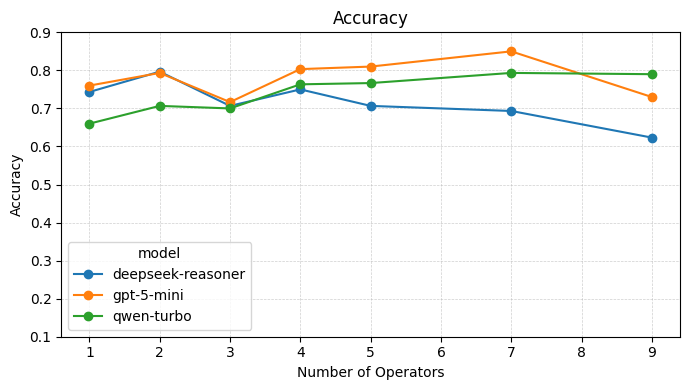

In [67]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(direct_fixed_e_df, x='number_of_operators', y='accuracy', z='model', title='Accuracy',
           x_label='Number of Operators',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.2. Precision

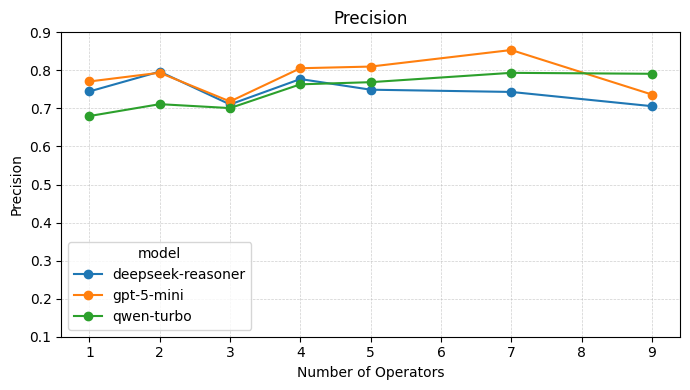

In [68]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(direct_fixed_e_df, x='number_of_operators', y='precision', z='model', title='Precision',
           x_label='Number of Operators',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.3. Recall

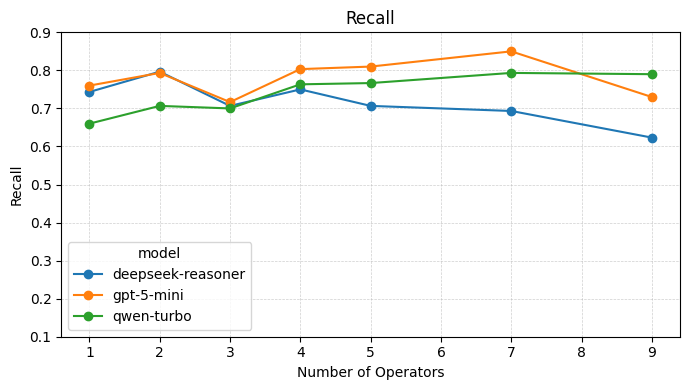

In [69]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(direct_fixed_e_df, x='number_of_operators', y='recall', z='model', title='Recall',
           x_label='Number of Operators',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.4. F1

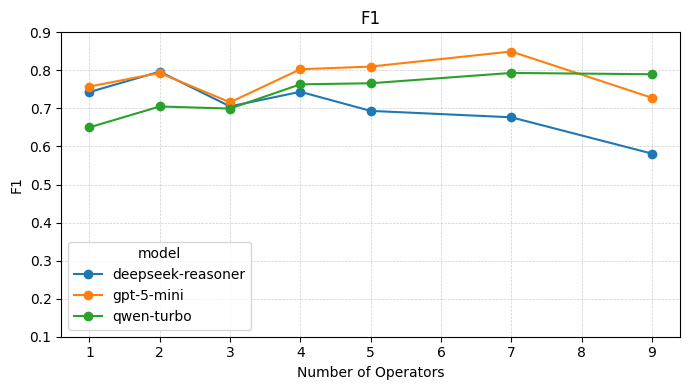

In [70]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(direct_fixed_e_df, x='number_of_operators', y='f1', z='model', title='F1', x_label='Number of Operators',
           y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.5. AUC

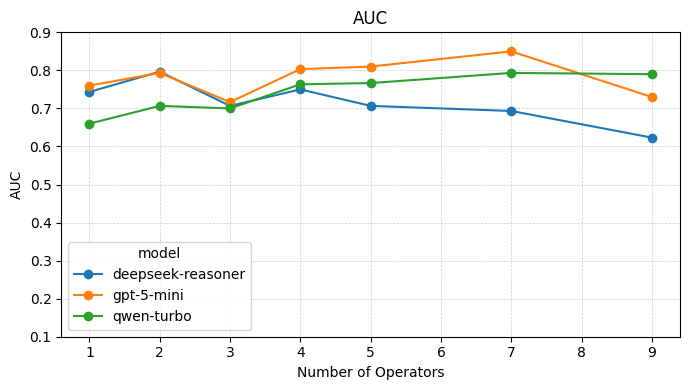

In [71]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(direct_fixed_e_df, x='number_of_operators', y='auc', z='model', title='AUC', x_label='Number of Operators',
           y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

### Zero-Shot CoT

In [72]:
zero_shot_cot_fixed_e_df = show_results_across_formulas(models, "zero_shot_cot")
zero_shot_cot_fixed_e_df

,number_of_operators,accuracy,precision,recall,f1,auc,model
0,1,0.750000,0.751892,0.750000,0.749530,0.750000,deepseek-reasoner
1,2,0.786667,0.786718,0.786667,0.786657,0.786667,deepseek-reasoner
2,3,0.710000,0.713424,0.710000,0.708832,0.710000,deepseek-reasoner
3,4,0.733333,0.774352,0.733333,0.722979,0.733333,deepseek-reasoner
4,5,0.703333,0.743623,0.703333,0.690539,0.703333,deepseek-reasoner
5,7,0.716667,0.783909,0.716667,0.698834,0.716667,deepseek-reasoner
6,9,0.613333,0.691960,0.613333,0.569222,0.613333,deepseek-reasoner
7,1,0.740000,0.752999,0.740000,0.736617,0.740000,gpt-5-mini
8,2,0.783333,0.783648,0.783333,0.783273,0.783333,gpt-5-mini
9,3,0.716667,0.717449,0.716667,0.716411,0.716667,gpt-5-mini


#### 2.1. Accuracy

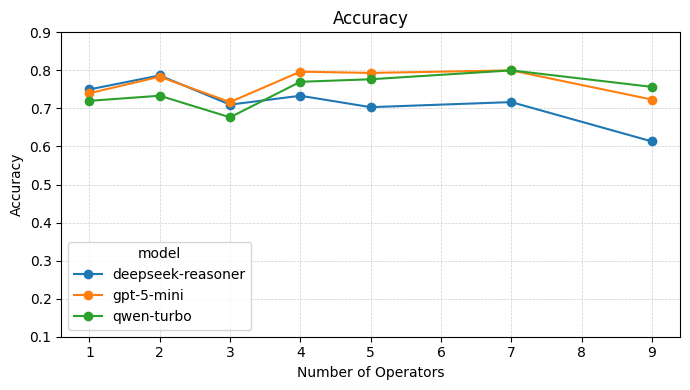

In [73]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(zero_shot_cot_fixed_e_df, x='number_of_operators', y='accuracy', z='model', title='Accuracy',
           x_label='Number of Operators',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.2. Precision

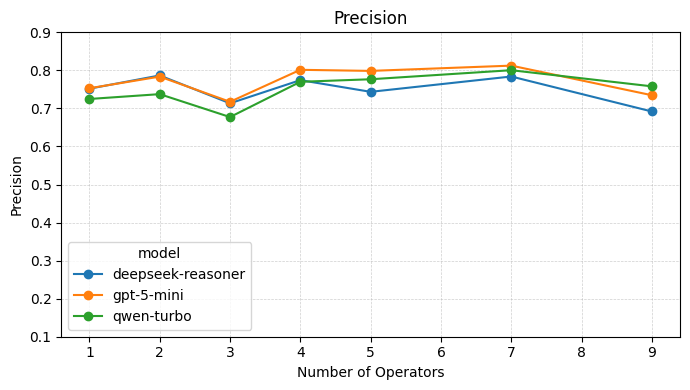

In [74]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(zero_shot_cot_fixed_e_df, x='number_of_operators', y='precision', z='model', title='Precision',
           x_label='Number of Operators',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.3. Recall

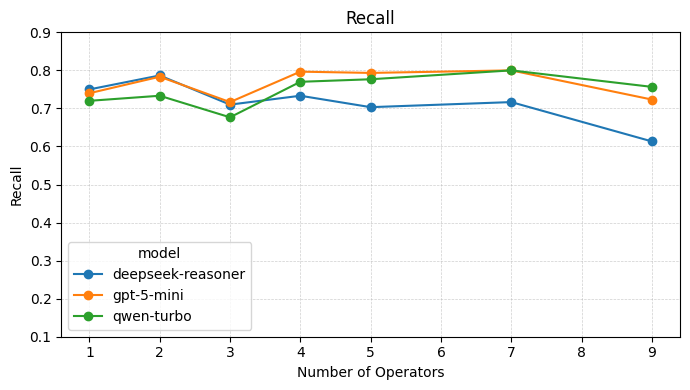

In [75]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(zero_shot_cot_fixed_e_df, x='number_of_operators', y='recall', z='model', title='Recall',
           x_label='Number of Operators',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.4. F1

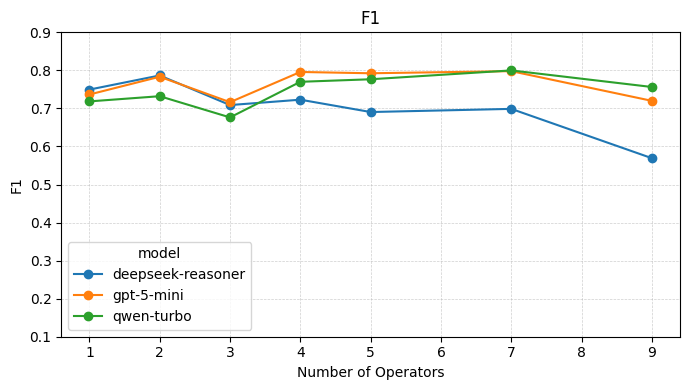

In [76]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(zero_shot_cot_fixed_e_df, x='number_of_operators', y='f1', z='model', title='F1', x_label='Number of Operators',
           y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.5. AUC

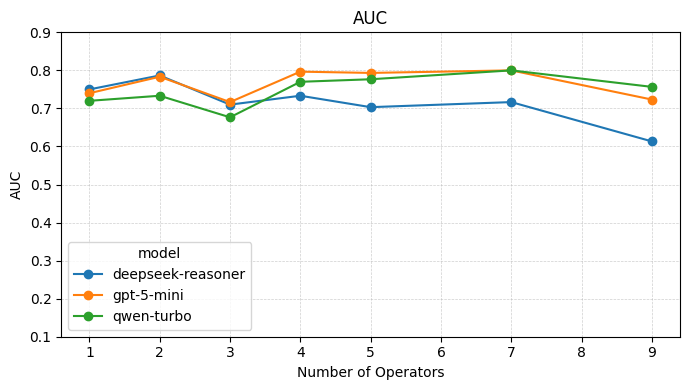

In [77]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(zero_shot_cot_fixed_e_df, x='number_of_operators', y='auc', z='model', title='AUC', x_label='Number of Operators',
           y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

### Few-Shot CoT

In [78]:
few_shot_cot_fixed_e_df = show_results_across_formulas(models, "few_shot_cot")
few_shot_cot_fixed_e_df

,number_of_operators,accuracy,precision,recall,f1,auc,model
0,1,0.873333,0.875738,0.873333,0.873130,0.873333,deepseek-reasoner
1,2,0.913333,0.915179,0.913333,0.913237,0.913333,deepseek-reasoner
2,3,0.876667,0.879517,0.876667,0.876435,0.876667,deepseek-reasoner
3,4,0.883333,0.890997,0.883333,0.882759,0.883333,deepseek-reasoner
4,5,0.880000,0.893719,0.880000,0.878945,0.880000,deepseek-reasoner
5,7,0.860000,0.879498,0.860000,0.858178,0.860000,deepseek-reasoner
6,9,0.823333,0.852283,0.823333,0.819628,0.823333,deepseek-reasoner
7,1,0.920000,0.920299,0.920000,0.919986,0.920000,gpt-5-mini
8,2,0.976667,0.976688,0.976667,0.976666,0.976667,gpt-5-mini
9,3,0.963333,0.963849,0.963333,0.963323,0.963333,gpt-5-mini


#### 2.1. Accuracy

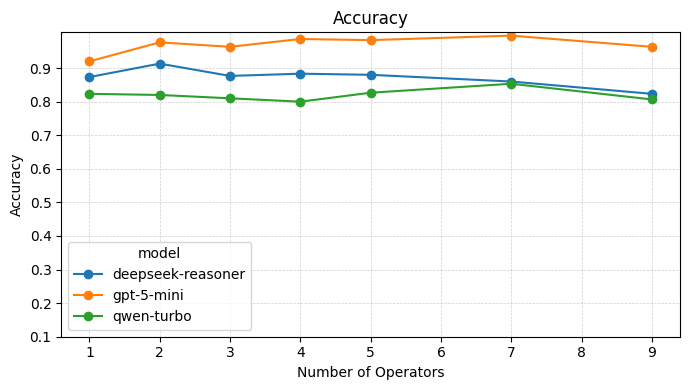

In [79]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(few_shot_cot_fixed_e_df, x='number_of_operators', y='accuracy', z='model', title='Accuracy',
           x_label='Number of Operators',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.2. Precision

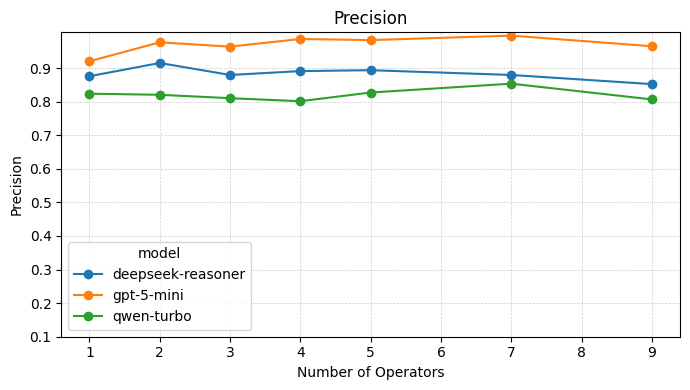

In [80]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(few_shot_cot_fixed_e_df, x='number_of_operators', y='precision', z='model', title='Precision',
           x_label='Number of Operators',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.3. Recall

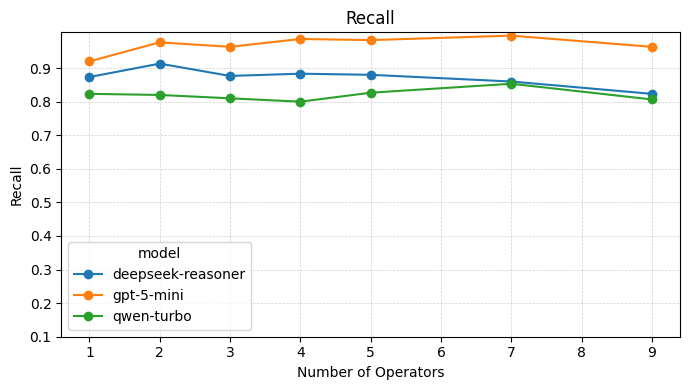

In [81]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(few_shot_cot_fixed_e_df, x='number_of_operators', y='recall', z='model', title='Recall',
           x_label='Number of Operators',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.4. F1

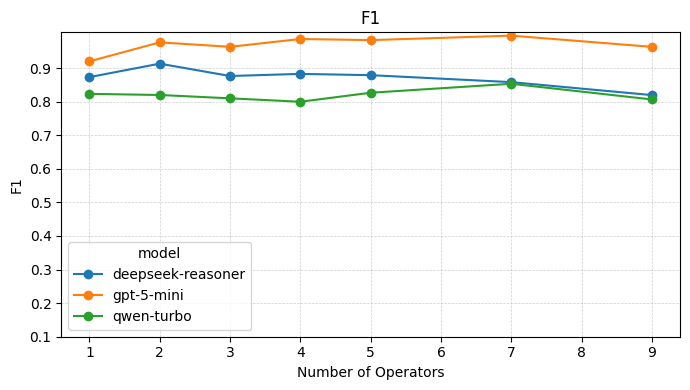

In [82]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(few_shot_cot_fixed_e_df, x='number_of_operators', y='f1', z='model', title='F1', x_label='Number of Operators',
           y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.5. AUC

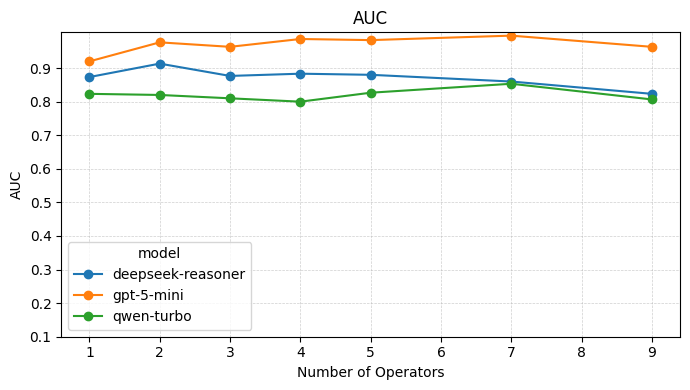

In [83]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(few_shot_cot_fixed_e_df, x='number_of_operators', y='auc', z='model', title='AUC', x_label='Number of Operators',
           y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

### Self-Consistency

In [84]:
self_consistency_fixed_e_df = show_results_across_formulas(models, "self_consistency")
self_consistency_fixed_e_df

,number_of_operators,accuracy,precision,recall,f1,auc,model
0,1,0.723333,0.728711,0.723333,0.721698,0.723333,deepseek-reasoner
1,2,0.793333,0.794643,0.793333,0.793103,0.793333,deepseek-reasoner
2,3,0.750000,0.750278,0.750000,0.749931,0.750000,deepseek-reasoner
3,4,0.793333,0.803923,0.793333,0.791517,0.793333,deepseek-reasoner
4,5,0.773333,0.786366,0.773333,0.770725,0.773333,deepseek-reasoner
5,7,0.740000,0.775735,0.740000,0.731294,0.740000,deepseek-reasoner
6,9,0.680000,0.720061,0.680000,0.664742,0.680000,deepseek-reasoner
7,1,0.743333,0.759098,0.743333,0.739369,0.743333,gpt-5-mini
8,2,0.800000,0.800481,0.800000,0.799920,0.800000,gpt-5-mini
9,3,0.720000,0.722532,0.720000,0.719201,0.720000,gpt-5-mini


#### 2.1. Accuracy

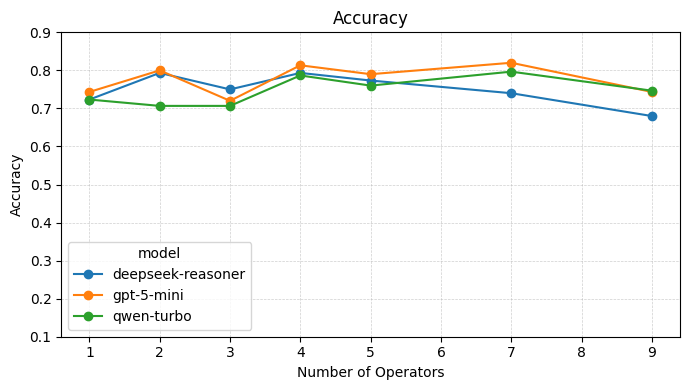

In [85]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(self_consistency_fixed_e_df, x='number_of_operators', y='accuracy', z='model', title='Accuracy',
           x_label='Number of Operators',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.2. Precision

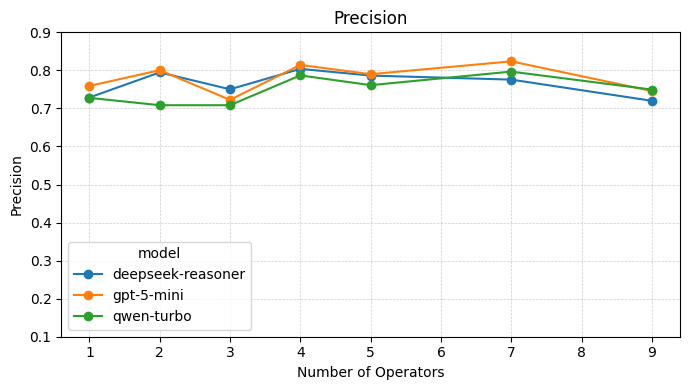

In [86]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(self_consistency_fixed_e_df, x='number_of_operators', y='precision', z='model', title='Precision',
           x_label='Number of Operators',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.3. Recall

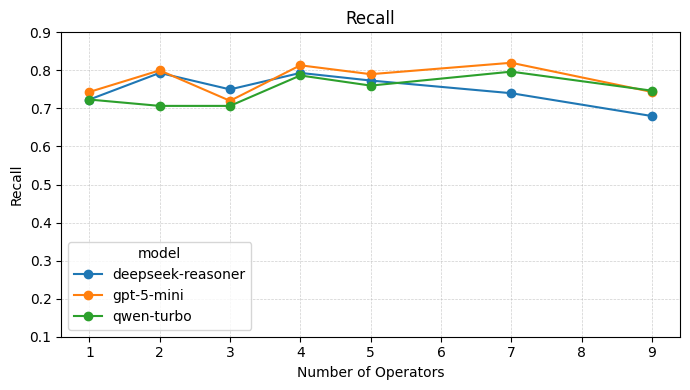

In [87]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(self_consistency_fixed_e_df, x='number_of_operators', y='recall', z='model', title='Recall',
           x_label='Number of Operators',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.4. F1

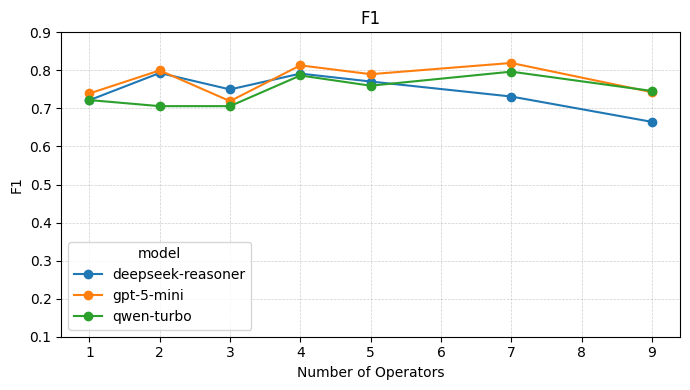

In [88]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(self_consistency_fixed_e_df, x='number_of_operators', y='f1', z='model', title='F1', x_label='Number of Operators',
           y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.5. AUC

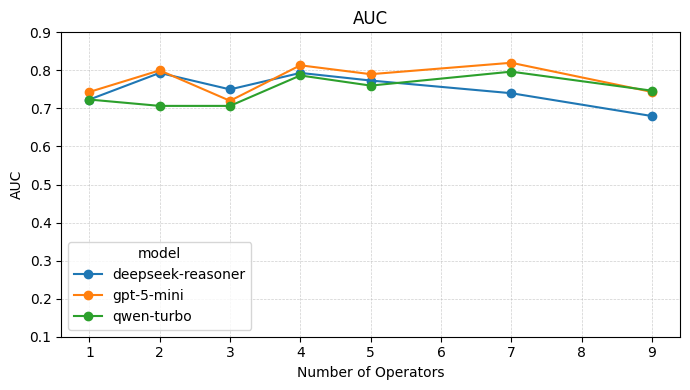

In [89]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(self_consistency_fixed_e_df, x='number_of_operators', y='auc', z='model', title='AUC', x_label='Number of Operators',
           y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

### Least-to-Most

In [90]:
least_to_most_fixed_e_df = show_results_across_formulas(models, "least_to_most")
least_to_most_fixed_e_df

,number_of_operators,accuracy,precision,recall,f1,auc,model
0,1,0.736667,0.741398,0.736667,0.735370,0.736667,deepseek-reasoner
1,2,0.796667,0.798271,0.796667,0.796393,0.796667,deepseek-reasoner
2,3,0.766667,0.766714,0.766667,0.766656,0.766667,deepseek-reasoner
3,4,0.756667,0.779647,0.756667,0.751563,0.756667,deepseek-reasoner
4,5,0.766667,0.787081,0.766667,0.762443,0.766667,deepseek-reasoner
5,7,0.750000,0.795757,0.750000,0.739942,0.750000,deepseek-reasoner
6,9,0.676667,0.720698,0.676667,0.659693,0.676667,deepseek-reasoner
7,1,0.766667,0.776294,0.766667,0.764616,0.766667,gpt-5-mini
8,2,0.776667,0.777271,0.776667,0.776545,0.776667,gpt-5-mini
9,3,0.720000,0.721417,0.720000,0.719551,0.720000,gpt-5-mini


#### 2.1. Accuracy

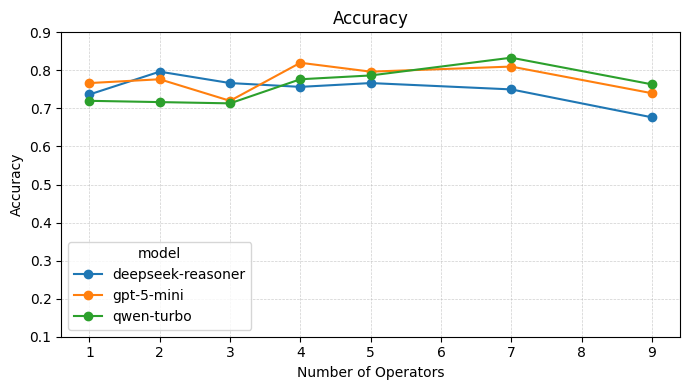

In [91]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(least_to_most_fixed_e_df, x='number_of_operators', y='accuracy', z='model', title='Accuracy',
           x_label='Number of Operators',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.2. Precision

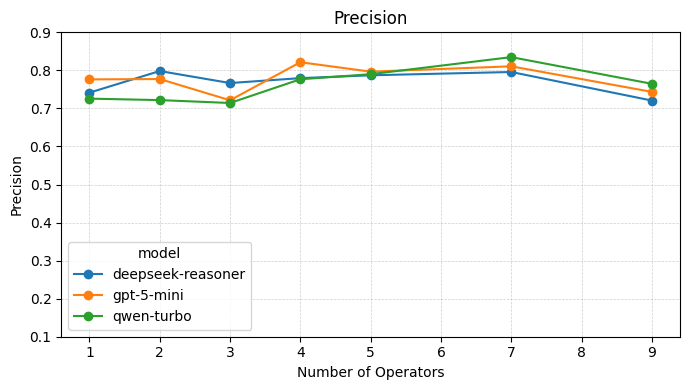

In [92]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(least_to_most_fixed_e_df, x='number_of_operators', y='precision', z='model', title='Precision',
           x_label='Number of Operators',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.3. Recall

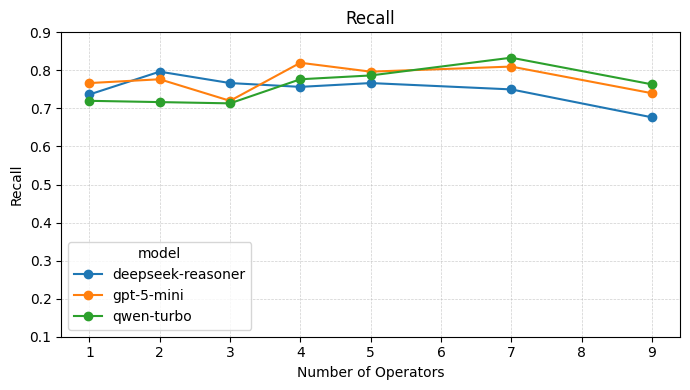

In [93]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(least_to_most_fixed_e_df, x='number_of_operators', y='recall', z='model', title='Recall',
           x_label='Number of Operators',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.4. F1

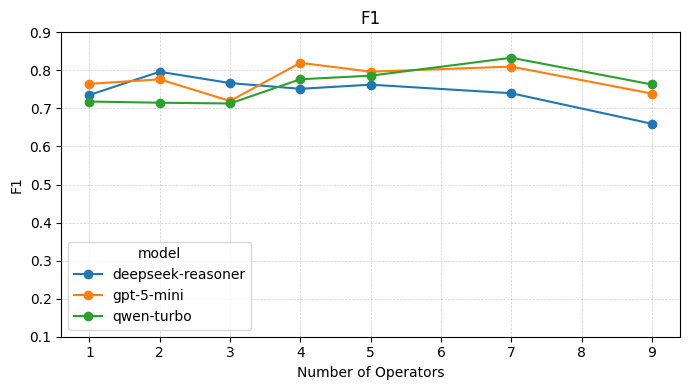

In [94]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(least_to_most_fixed_e_df, x='number_of_operators', y='f1', z='model', title='F1', x_label='Number of Operators',
           y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

#### 2.5. AUC

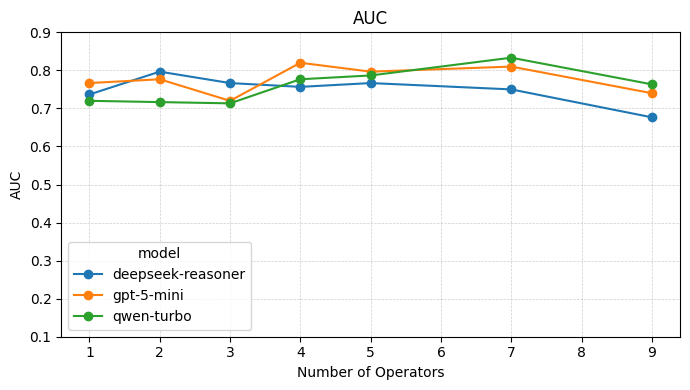

In [95]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(least_to_most_fixed_e_df, x='number_of_operators', y='auc', z='model', title='AUC', x_label='Number of Operators',
           y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

## 3. Operator 2, Event 2-9, Count 300

In [96]:
models = ["deepseek-reasoner", "gpt-5-mini","qwen-turbo"]

In [97]:
def show_results_across_events(_models: list[str], _strategy: str, _formula_n=2, _count=300,
                                    _events: Union[list[int], None] = None):
    if _events is None:
        _events = [2, 3, 4, 5, 7, 9]
    all_models_df = pd.DataFrame()
    for _model in _models:
        model_data = {}
        for _event_n in _events:
            _path = get_evaluation_file_path(
                event_n=_event_n,
                formula_n=_formula_n,
                count=_count,
                model=_model,
                strategy=_strategy
            )
            if not os.path.exists(_path):
                warnings.warn(
                    f"Evaluation file for model '{_model}', strategy '{_strategy}', event {_event_n} does not exist.",
                    UserWarning
                )
                continue
            _df = pd.read_csv(_path)
            _df["answer"] = _df["answer"].apply(lambda x: 1 if x else 0)
            _df["prediction"] = _df["prediction"].apply(lambda x: 1 if pd.notna(x) and x == 1 else 0)
            model_data[_event_n] = metrics(_df)["raw"]

        # Convert per-model data into a DataFrame
        model_df = (
            pd.DataFrame(model_data)
            .transpose()
            .reset_index()
            .rename(columns={"index": "number_of_events"})
        )
        model_df["model"] = _model

        # Combine all models' data
        all_models_df = pd.concat([all_models_df, model_df], ignore_index=True)

    return all_models_df

### Direct

In [98]:
direct_fixed_f_df = show_results_across_events(models, "direct")
direct_fixed_f_df

,number_of_events,accuracy,precision,recall,f1,auc,model
0,2,0.796667,0.796785,0.796667,0.796646,0.796667,deepseek-reasoner
1,3,0.763333,0.768598,0.763333,0.762168,0.763333,deepseek-reasoner
2,4,0.723333,0.747647,0.723333,0.716372,0.723333,deepseek-reasoner
3,5,0.740000,0.767380,0.740000,0.733169,0.740000,deepseek-reasoner
4,7,0.676667,0.727676,0.676667,0.657482,0.676667,deepseek-reasoner
5,9,0.600000,0.660302,0.600000,0.558477,0.600000,deepseek-reasoner
6,2,0.793333,0.793803,0.793333,0.793251,0.793333,gpt-5-mini
7,3,0.800000,0.800213,0.800000,0.799964,0.800000,gpt-5-mini
8,4,0.736667,0.751999,0.736667,0.732599,0.736667,gpt-5-mini
9,5,0.783333,0.801689,0.783333,0.779987,0.783333,gpt-5-mini


#### 3.1. Accuracy

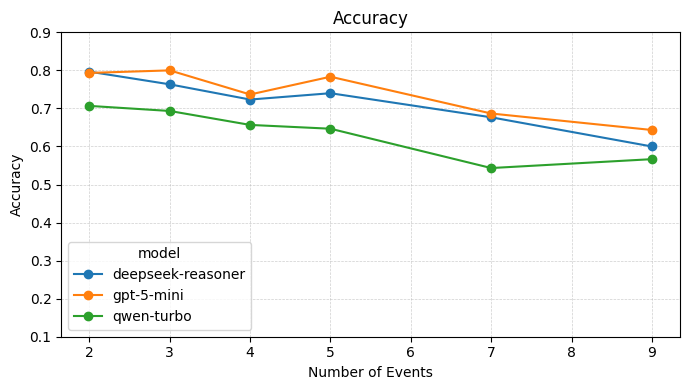

In [99]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(direct_fixed_f_df, x='number_of_events', y='accuracy', z='model', title='Accuracy',
           x_label='Number of Events',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.2. Precision

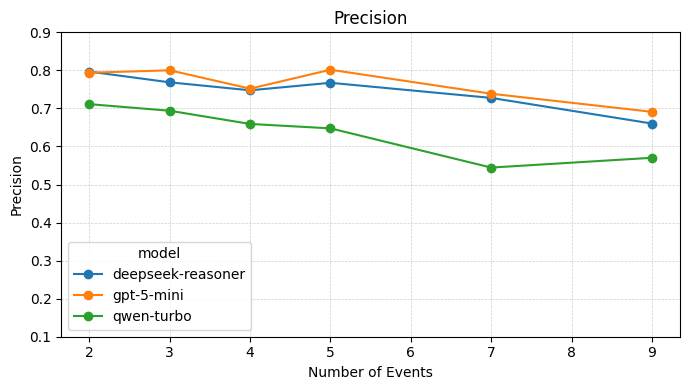

In [100]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(direct_fixed_f_df, x='number_of_events', y='precision', z='model', title='Precision',
           x_label='Number of Events',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.3. Recall

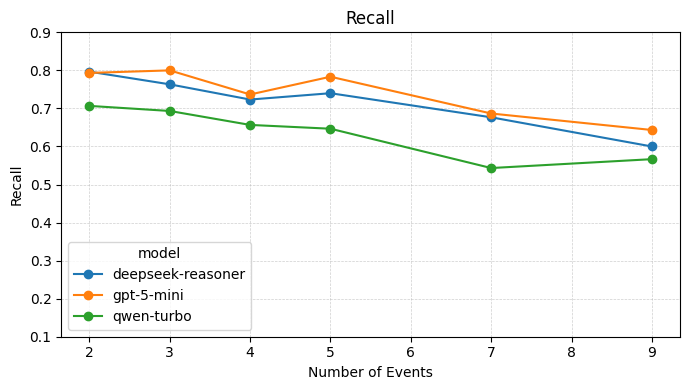

In [101]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(direct_fixed_f_df, x='number_of_events', y='recall', z='model', title='Recall',
           x_label='Number of Events',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.4. F1

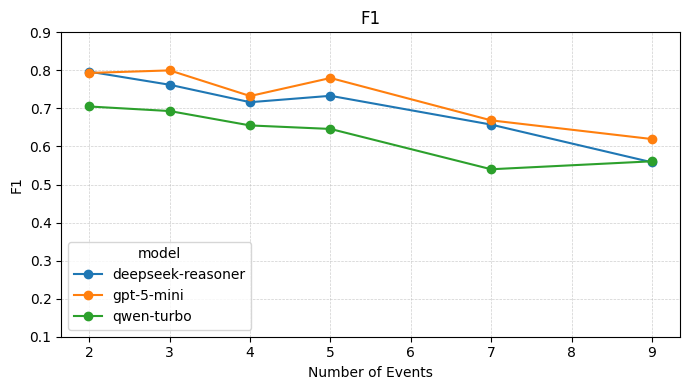

In [102]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(direct_fixed_f_df, x='number_of_events', y='f1', z='model', title='F1', x_label='Number of Events',
           y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.5. AUC

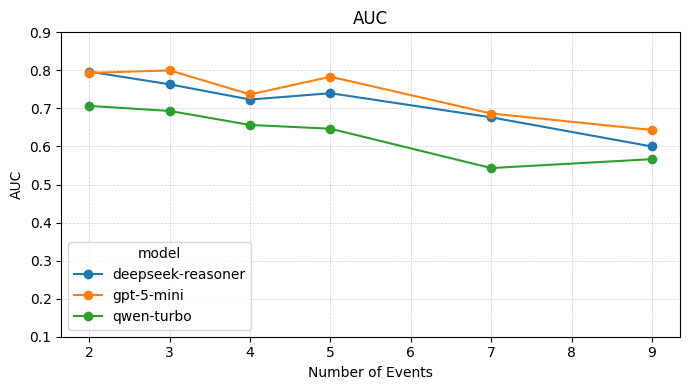

In [103]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(direct_fixed_f_df, x='number_of_events', y='auc', z='model', title='AUC', x_label='Number of Events',
           y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

### Zero-Shot CoT

In [104]:
zero_shot_cot_fixed_f_df = show_results_across_events(models, "zero_shot_cot")
zero_shot_cot_fixed_f_df

,number_of_events,accuracy,precision,recall,f1,auc,model
0,2,0.786667,0.786718,0.786667,0.786657,0.786667,deepseek-reasoner
1,3,0.726667,0.738943,0.726667,0.723110,0.726667,deepseek-reasoner
2,4,0.713333,0.737671,0.713333,0.705802,0.713333,deepseek-reasoner
3,5,0.723333,0.750012,0.723333,0.715750,0.723333,deepseek-reasoner
4,7,0.696667,0.745683,0.696667,0.680743,0.696667,deepseek-reasoner
5,9,0.593333,0.649615,0.593333,0.551119,0.593333,deepseek-reasoner
6,2,0.783333,0.783648,0.783333,0.783273,0.783333,gpt-5-mini
7,3,0.800000,0.801339,0.800000,0.799778,0.800000,gpt-5-mini
8,4,0.746667,0.763583,0.746667,0.742536,0.746667,gpt-5-mini
9,5,0.780000,0.801435,0.780000,0.776018,0.780000,gpt-5-mini


#### 3.1. Accuracy

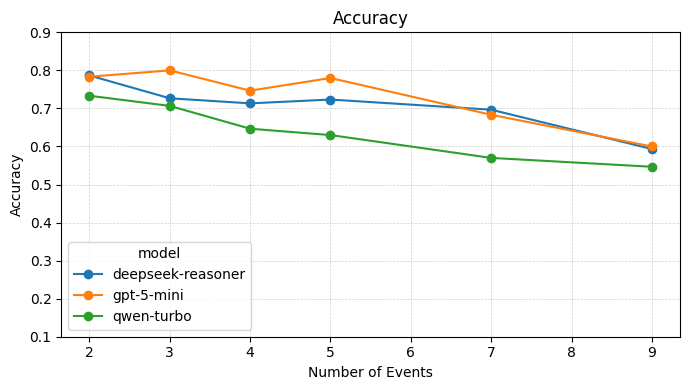

In [105]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(zero_shot_cot_fixed_f_df, x='number_of_events', y='accuracy', z='model', title='Accuracy',
           x_label='Number of Events',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.2. Precision

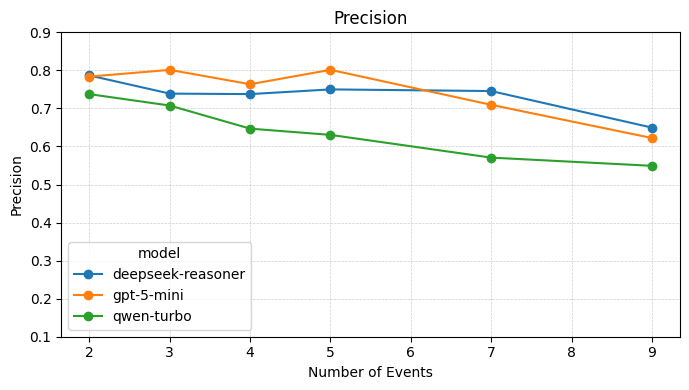

In [106]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(zero_shot_cot_fixed_f_df, x='number_of_events', y='precision', z='model', title='Precision',
           x_label='Number of Events',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.3. Recall

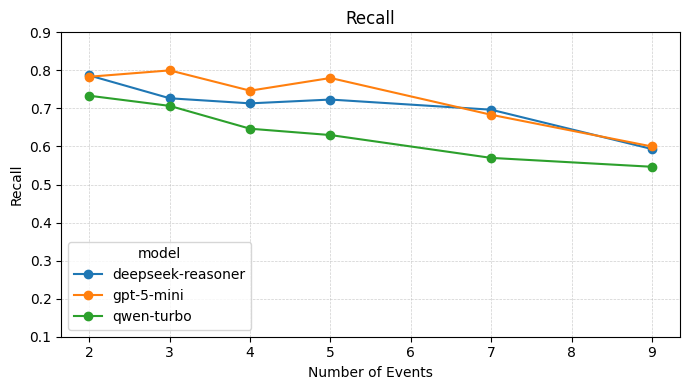

In [107]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(zero_shot_cot_fixed_f_df, x='number_of_events', y='recall', z='model', title='Recall',
           x_label='Number of Events',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.4. F1

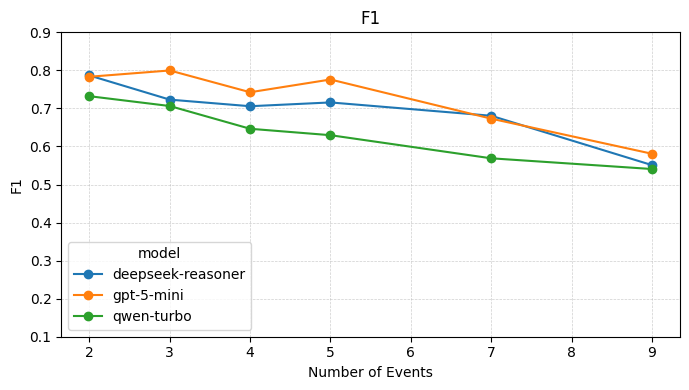

In [108]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(zero_shot_cot_fixed_f_df, x='number_of_events', y='f1', z='model', title='F1', x_label='Number of Events',
           y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.5. AUC

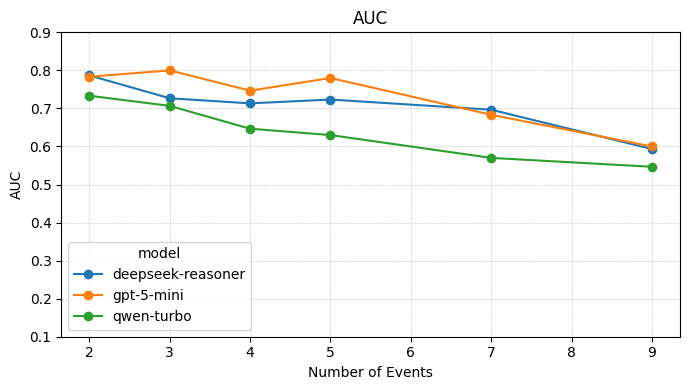

In [109]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(zero_shot_cot_fixed_f_df, x='number_of_events', y='auc', z='model', title='AUC', x_label='Number of Events',
           y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

### Few-Shot CoT

In [110]:
few_shot_cot_fixed_f_df = show_results_across_events(models, "few_shot_cot")
few_shot_cot_fixed_f_df

,number_of_events,accuracy,precision,recall,f1,auc,model
0,2,0.913333,0.915179,0.913333,0.913237,0.913333,deepseek-reasoner
1,3,0.840000,0.854167,0.840000,0.838384,0.840000,deepseek-reasoner
2,4,0.813333,0.842832,0.813333,0.809230,0.813333,deepseek-reasoner
3,5,0.763333,0.804236,0.763333,0.755102,0.763333,deepseek-reasoner
4,7,0.716667,0.770668,0.716667,0.701793,0.716667,deepseek-reasoner
5,9,0.686667,0.725129,0.686667,0.672687,0.686667,deepseek-reasoner
6,2,0.976667,0.976688,0.976667,0.976666,0.976667,gpt-5-mini
7,3,0.960000,0.960000,0.960000,0.960000,0.960000,gpt-5-mini
8,4,0.936667,0.939971,0.936667,0.936548,0.936667,gpt-5-mini
9,5,0.893333,0.895867,0.893333,0.893162,0.893333,gpt-5-mini


#### 3.1. Accuracy

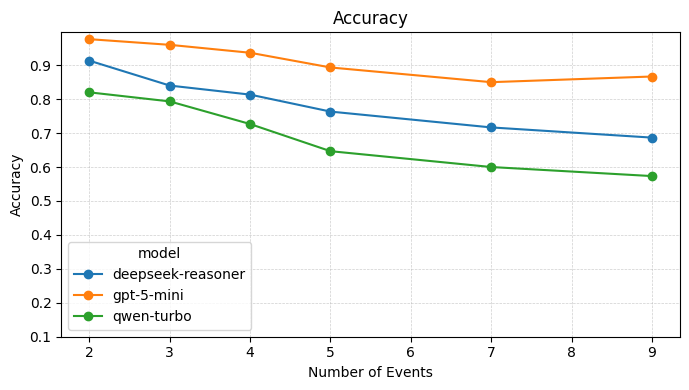

In [111]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(few_shot_cot_fixed_f_df, x='number_of_events', y='accuracy', z='model', title='Accuracy',
           x_label='Number of Events',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.2. Precision

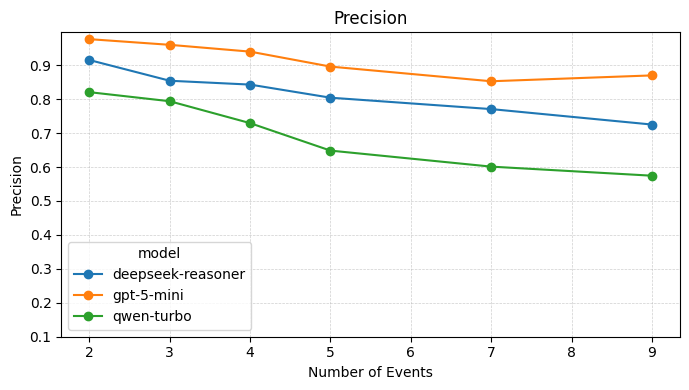

In [112]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(few_shot_cot_fixed_f_df, x='number_of_events', y='precision', z='model', title='Precision',
           x_label='Number of Events',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.3. Recall

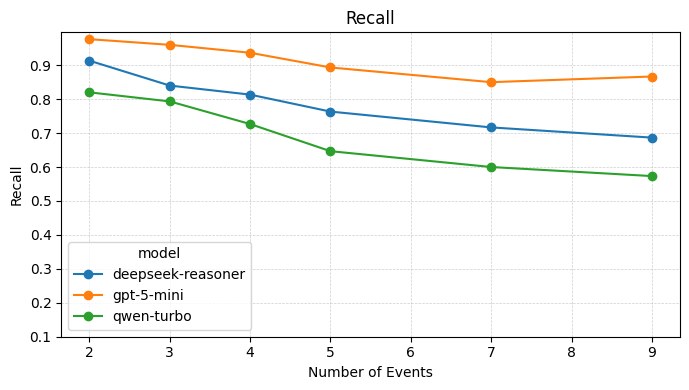

In [113]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(few_shot_cot_fixed_f_df, x='number_of_events', y='recall', z='model', title='Recall',
           x_label='Number of Events',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.4. F1

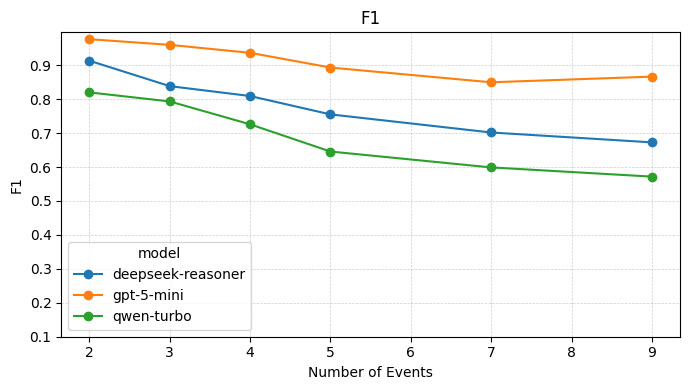

In [114]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(few_shot_cot_fixed_f_df, x='number_of_events', y='f1', z='model', title='F1', x_label='Number of Events',
           y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.5. AUC

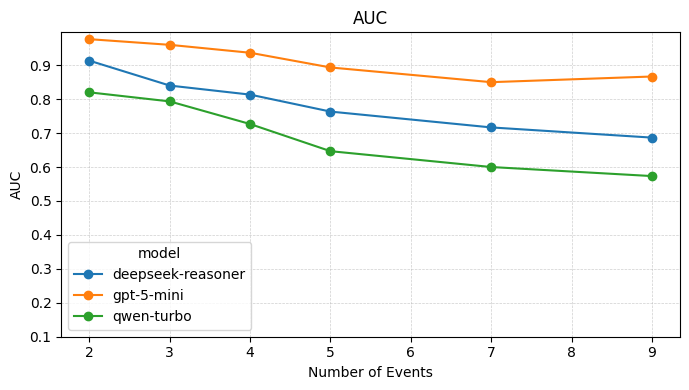

In [115]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(few_shot_cot_fixed_f_df, x='number_of_events', y='auc', z='model', title='AUC', x_label='Number of Events',
           y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

### Self-Consistency

In [116]:
self_consistency_fixed_f_df = show_results_across_events(models, "self_consistency")
self_consistency_fixed_f_df

,number_of_events,accuracy,precision,recall,f1,auc,model
0,2,0.793333,0.794643,0.793333,0.793103,0.793333,deepseek-reasoner
1,3,0.780000,0.780799,0.780000,0.779843,0.780000,deepseek-reasoner
2,4,0.726667,0.737474,0.726667,0.723521,0.726667,deepseek-reasoner
3,5,0.773333,0.784722,0.773333,0.771044,0.773333,deepseek-reasoner
4,7,0.656667,0.670694,0.656667,0.649465,0.656667,deepseek-reasoner
5,9,0.590000,0.612431,0.590000,0.568477,0.590000,deepseek-reasoner
6,2,0.800000,0.800481,0.800000,0.799920,0.800000,gpt-5-mini
7,3,0.810000,0.810124,0.810000,0.809981,0.810000,gpt-5-mini
8,4,0.770000,0.785546,0.770000,0.766826,0.770000,gpt-5-mini
9,5,0.806667,0.832755,0.806667,0.802802,0.806667,gpt-5-mini


#### 3.1. Accuracy

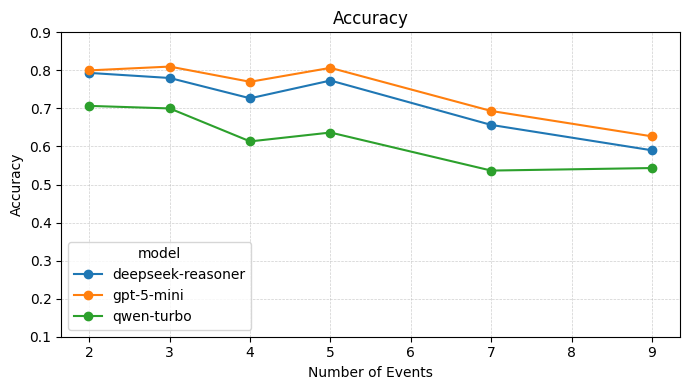

In [117]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(self_consistency_fixed_f_df, x='number_of_events', y='accuracy', z='model', title='Accuracy',
           x_label='Number of Events',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.2. Precision

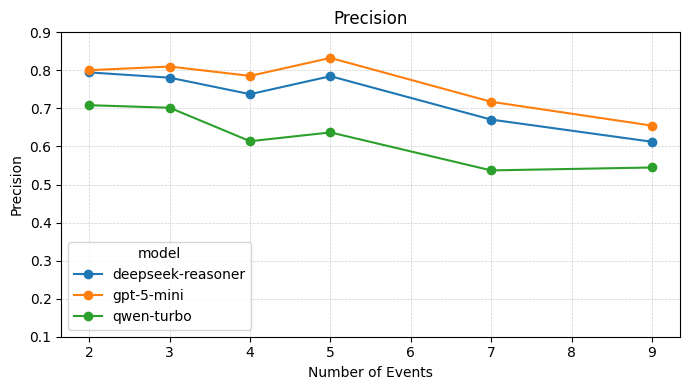

In [118]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(self_consistency_fixed_f_df, x='number_of_events', y='precision', z='model', title='Precision',
           x_label='Number of Events',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.3. Recall

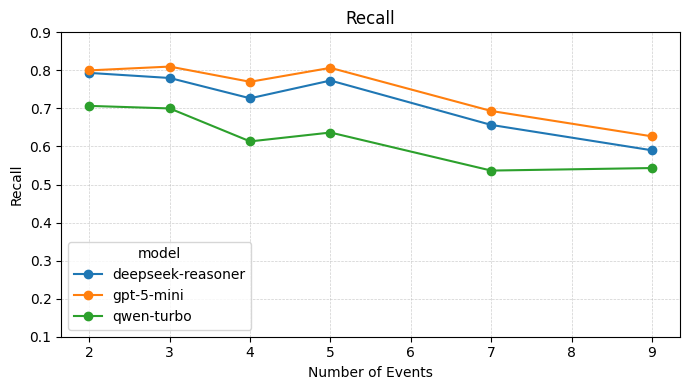

In [119]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(self_consistency_fixed_f_df, x='number_of_events', y='recall', z='model', title='Recall',
           x_label='Number of Events',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.4. F1

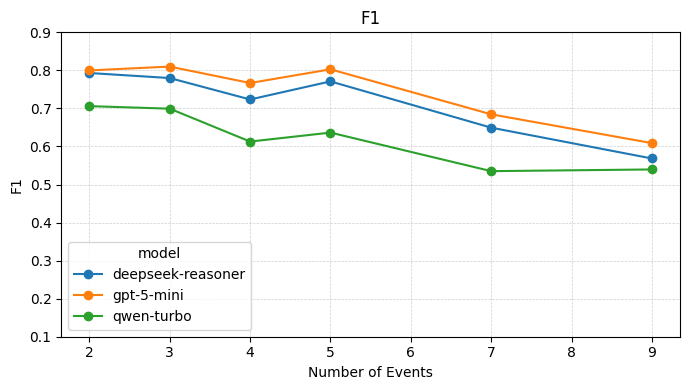

In [120]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(self_consistency_fixed_f_df, x='number_of_events', y='f1', z='model', title='F1', x_label='Number of Events',
           y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.5. AUC

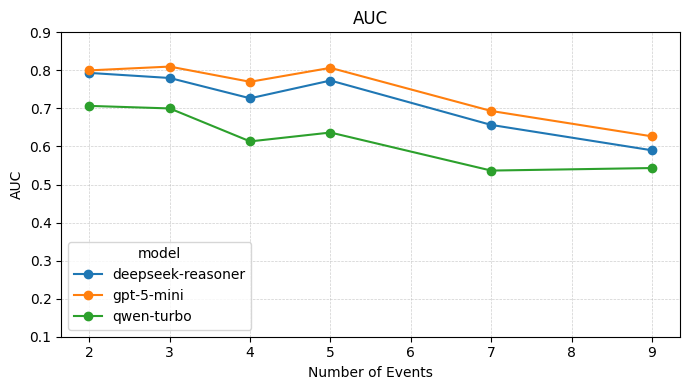

In [121]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(self_consistency_fixed_f_df, x='number_of_events', y='auc', z='model', title='AUC', x_label='Number of Events',
           y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

### Least-to-Most

In [122]:
least_to_most_fixed_f_df = show_results_across_events(models, "least_to_most")
least_to_most_fixed_f_df

,number_of_events,accuracy,precision,recall,f1,auc,model
0,2,0.796667,0.798271,0.796667,0.796393,0.796667,deepseek-reasoner
1,3,0.763333,0.767627,0.763333,0.762380,0.763333,deepseek-reasoner
2,4,0.740000,0.756459,0.740000,0.735760,0.740000,deepseek-reasoner
3,5,0.743333,0.757344,0.743333,0.739792,0.743333,deepseek-reasoner
4,7,0.726667,0.757628,0.726667,0.718200,0.726667,deepseek-reasoner
5,9,0.626667,0.677019,0.626667,0.598086,0.626667,deepseek-reasoner
6,2,0.776667,0.777271,0.776667,0.776545,0.776667,gpt-5-mini
7,3,0.793333,0.793803,0.793333,0.793251,0.793333,gpt-5-mini
8,4,0.763333,0.768598,0.763333,0.762168,0.763333,gpt-5-mini
9,5,0.750000,0.754998,0.750000,0.748769,0.750000,gpt-5-mini


#### 3.1. Accuracy

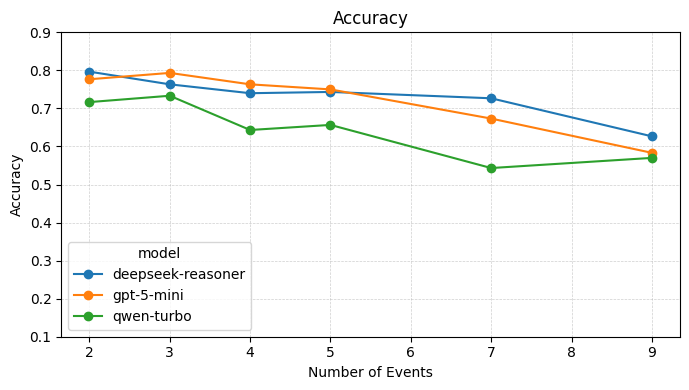

In [123]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(least_to_most_fixed_f_df, x='number_of_events', y='accuracy', z='model', title='Accuracy',
           x_label='Number of Events',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.2. Precision

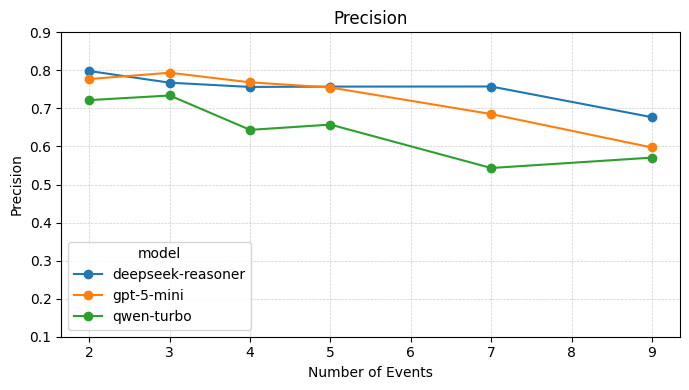

In [124]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(least_to_most_fixed_f_df, x='number_of_events', y='precision', z='model', title='Precision',
           x_label='Number of Events',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.3. Recall

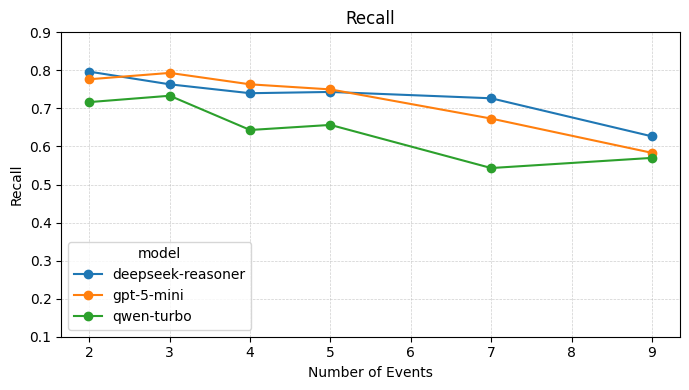

In [125]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(least_to_most_fixed_f_df, x='number_of_events', y='recall', z='model', title='Recall',
           x_label='Number of Events',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.4. F1

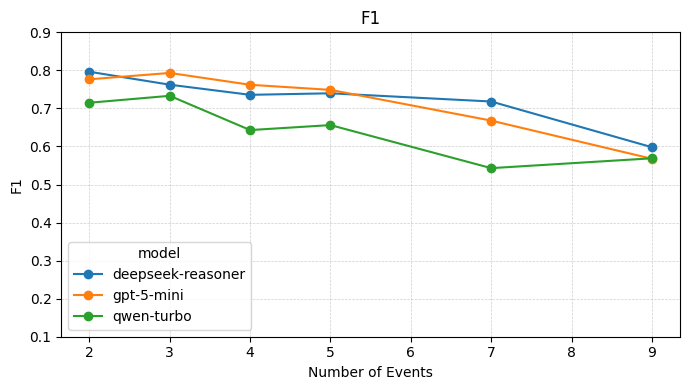

In [126]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(least_to_most_fixed_f_df, x='number_of_events', y='f1', z='model', title='F1', x_label='Number of Events',
           y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

#### 3.5. AUC

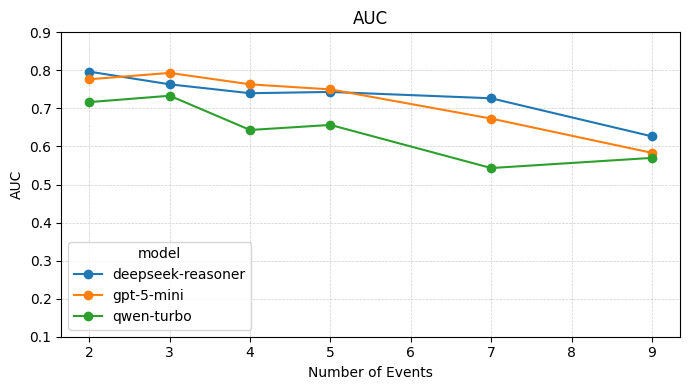

In [127]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(least_to_most_fixed_f_df, x='number_of_events', y='auc', z='model', title='AUC', x_label='Number of Events',
           y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

# Strategy Analysis

In [128]:
models = ["gpt-3.5-turbo", "gpt-4o-mini", "gpt-5-mini", "gemma3:12b-it-q8_0", "mistral:7b-instruct",
          "deepseek-reasoner", "deepseek-chat", "phi4:14b", "qwen-turbo", "qwen2.5-72b-instruct", 
          "qwen3-14b", "qwen3-32b"]
strategies = ["direct", "zero_shot_cot", "few_shot_cot", "self_consistency", "least_to_most"]

## 1. LTLBench: Event 3, Operator 3, Count 2000

In [129]:
def show_strategies_comparison(_models: list[str], _strategies: list[str], _event_n=3, _formula_n=3, _count=2000):
    """Compare strategies across models for a fixed configuration"""
    all_strategies_data = []
    
    for _strategy in _strategies:
        strategy_metrics = []
        for _model in _models:
            _path = get_evaluation_file_path(
                event_n=_event_n,
                formula_n=_formula_n,
                count=_count,
                model=_model,
                strategy=_strategy
            )
            if not os.path.exists(_path):
                warnings.warn(
                    f"Evaluation file for model '{_model}', strategy '{_strategy}' does not exist.",
                    UserWarning
                )
                continue
            _df = pd.read_csv(_path)
            _df["answer"] = _df["answer"].apply(lambda x: 1 if x else 0)
            _df["prediction"] = _df["prediction"].apply(lambda x: 1 if pd.notna(x) and x == 1 else 0)
            strategy_metrics.append(metrics(_df)["raw"])
        
        # Calculate average metrics across all models for this strategy
        if strategy_metrics:
            avg_metrics = pd.DataFrame(strategy_metrics).mean().to_dict()
            avg_metrics["strategy"] = _strategy
            all_strategies_data.append(avg_metrics)
    
    # Create DataFrame with strategy as index
    result_df = pd.DataFrame(all_strategies_data)
    result_df = result_df.set_index("strategy")
    
    return result_df

In [130]:
strategies_comparison_df = show_strategies_comparison(models, strategies)
strategies_comparison_df

,accuracy,precision,recall,f1,auc
strategy,,,,,
direct,0.658292,0.665428,0.658292,0.651010,0.658292
zero_shot_cot,0.671792,0.677098,0.671792,0.669172,0.671792
few_shot_cot,0.763292,0.766810,0.763292,0.762632,0.763292
self_consistency,0.682875,0.687246,0.682875,0.680397,0.682875
least_to_most,0.682125,0.688933,0.682125,0.671290,0.682125


## 2. Event 2, Operator 1-9, Count 300

In [131]:
def show_strategies_across_operators(_models: list[str], _strategies: list[str], _event_n=2, _count=300,
                                      _formulas: Union[list[int], None] = None):
    """Compare strategies across varying number of operators, averaged across models"""
    if _formulas is None:
        _formulas = [1, 2, 3, 4, 5, 7, 9]
    
    all_strategies_df = pd.DataFrame()
    
    for _strategy in _strategies:
        strategy_data = {}
        for _formula_n in _formulas:
            formula_metrics = []
            for _model in _models:
                _path = get_evaluation_file_path(
                    event_n=_event_n,
                    formula_n=_formula_n,
                    count=_count,
                    model=_model,
                    strategy=_strategy
                )
                if not os.path.exists(_path):
                    continue
                _df = pd.read_csv(_path)
                _df["answer"] = _df["answer"].apply(lambda x: 1 if x else 0)
                _df["prediction"] = _df["prediction"].apply(lambda x: 1 if pd.notna(x) and x == 1 else 0)
                formula_metrics.append(metrics(_df)["raw"])
            
            # Average across all models for this formula
            if formula_metrics:
                strategy_data[_formula_n] = pd.DataFrame(formula_metrics).mean().to_dict()
        
        # Convert to DataFrame
        strategy_df = (
            pd.DataFrame(strategy_data)
            .transpose()
            .reset_index()
            .rename(columns={"index": "number_of_operators"})
        )
        strategy_df["strategy"] = _strategy
        
        all_strategies_df = pd.concat([all_strategies_df, strategy_df], ignore_index=True)
    
    return all_strategies_df

In [132]:
strategies_across_operators_df = show_strategies_across_operators(models, strategies)
strategies_across_operators_df

,number_of_operators,accuracy,precision,recall,f1,auc,strategy
0,1,0.721111,0.731827,0.721111,0.716950,0.721111,direct
1,2,0.765556,0.767266,0.765556,0.764993,0.765556,direct
2,3,0.707778,0.709869,0.707778,0.707052,0.707778,direct
3,4,0.772222,0.782063,0.772222,0.770001,0.772222,direct
4,5,0.761111,0.776091,0.761111,0.756578,0.761111,direct
5,7,0.778889,0.796807,0.778889,0.773215,0.778889,direct
6,9,0.714444,0.744519,0.714444,0.699758,0.714444,direct
7,1,0.736667,0.743242,0.736667,0.734878,0.736667,zero_shot_cot
8,2,0.767778,0.769308,0.767778,0.767358,0.767778,zero_shot_cot
9,3,0.701111,0.702726,0.701111,0.700540,0.701111,zero_shot_cot


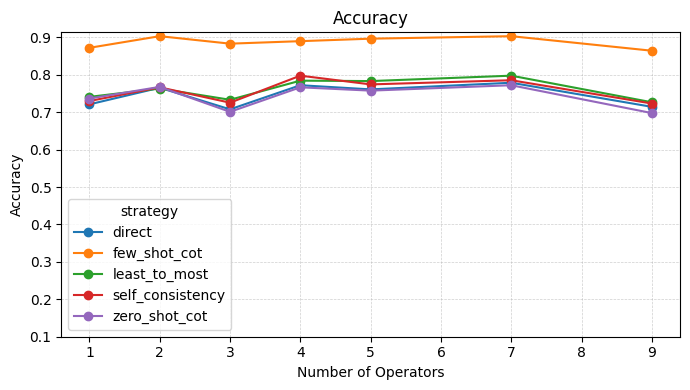

In [133]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(strategies_across_operators_df, x='number_of_operators', y='accuracy', z='strategy', title='Accuracy',
           x_label='Number of Operators',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

## 3. Operator 2, Event 2-9, Count 300

In [134]:
def show_strategies_across_events(_models: list[str], _strategies: list[str], _formula_n=2, _count=300,
                                   _events: Union[list[int], None] = None):
    """Compare strategies across varying number of events, averaged across models"""
    if _events is None:
        _events = [2, 3, 4, 5, 7, 9]
    
    all_strategies_df = pd.DataFrame()
    
    for _strategy in _strategies:
        strategy_data = {}
        for _event_n in _events:
            event_metrics = []
            for _model in _models:
                _path = get_evaluation_file_path(
                    event_n=_event_n,
                    formula_n=_formula_n,
                    count=_count,
                    model=_model,
                    strategy=_strategy
                )
                if not os.path.exists(_path):
                    continue
                _df = pd.read_csv(_path)
                _df["answer"] = _df["answer"].apply(lambda x: 1 if x else 0)
                _df["prediction"] = _df["prediction"].apply(lambda x: 1 if pd.notna(x) and x == 1 else 0)
                event_metrics.append(metrics(_df)["raw"])
            
            # Average across all models for this event
            if event_metrics:
                strategy_data[_event_n] = pd.DataFrame(event_metrics).mean().to_dict()
        
        # Convert to DataFrame
        strategy_df = (
            pd.DataFrame(strategy_data)
            .transpose()
            .reset_index()
            .rename(columns={"index": "number_of_events"})
        )
        strategy_df["strategy"] = _strategy
        
        all_strategies_df = pd.concat([all_strategies_df, strategy_df], ignore_index=True)
    
    return all_strategies_df

In [135]:
strategies_across_events_df = show_strategies_across_events(models, strategies)
strategies_across_events_df

,number_of_events,accuracy,precision,recall,f1,auc,strategy
0,2,0.765556,0.767266,0.765556,0.764993,0.765556,direct
1,3,0.752222,0.754232,0.752222,0.751749,0.752222,direct
2,4,0.705556,0.719622,0.705556,0.701418,0.705556,direct
3,5,0.723333,0.738894,0.723333,0.719752,0.723333,direct
4,7,0.635556,0.670295,0.635556,0.622082,0.635556,direct
5,9,0.603333,0.640564,0.603333,0.579687,0.603333,direct
6,2,0.767778,0.769308,0.767778,0.767358,0.767778,zero_shot_cot
7,3,0.744444,0.749291,0.744444,0.743076,0.744444,zero_shot_cot
8,4,0.702222,0.716052,0.702222,0.698288,0.702222,zero_shot_cot
9,5,0.711111,0.727306,0.711111,0.707145,0.711111,zero_shot_cot


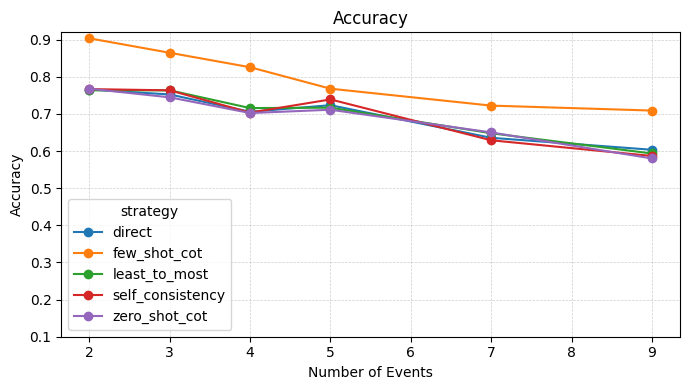

In [136]:
x_ticks = list(np.arange(2, 10))
y_ticks = list(np.arange(0.1, 1, 0.1))
plot_lines(strategies_across_events_df, x='number_of_events', y='accuracy', z='strategy', title='Accuracy',
           x_label='Number of Events',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)